<a href="https://colab.research.google.com/github/imguedes/Titanic/blob/main/CART_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Análise Preditiva com Árvore de Decisão**

> ENCE - Programação Avançada - Alunos: Isabella Guedes e Lucas Albuquerque

##**Bibliotecas e base**

In [20]:
#Bibliotecas utilizadas
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import matplotlib as mpl
import graphviz
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image  

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
#Base de treino
url = "https://raw.githubusercontent.com/imguedes/Titanic/main/train.csv"
df = pd.read_csv(url)
df.head()

In [ ]:
df.info()

##**Tratamento de dados**

In [ ]:
#Criando faixas etárias para melhor visualização dos dados
labels_age = ['Criança', "Adolescente", "Adulto", "Idoso"]
bins = [0,10,20,60,130]
df['Age_Score'] = pd.cut(df['Age'], bins, labels=labels_age)
df.loc[:,['Age','Age_Score']]

mpl.pyplot.show()
df.head()

#**Seleção de recursos**

In [11]:
#Alteração necessária porque a função DecisionTreeClassifier.fit requer variáveis int ou float
df.Sex.replace({'female':1,'male':0},inplace=True)

In [12]:
#Este código NÃO pode ser rodado mais de uma vez porque ele cria novas colunas!!!
df = pd.concat([df,pd.get_dummies(df.Age_Score, prefix=None, prefix_sep='_',)],axis=1)

In [ ]:
df

In [28]:
#Separando dataframe em recursos e variável alvo
col_recursos = ['Sex', 'Criança', 'Adolescente', 'Adulto', 'Idoso', 'Pclass', 'SibSp','Parch']
x = df[col_recursos] #Recursos
y = df.Survived      #Variável alvo

In [29]:
#Separando a base de treino em treino e validação (80% treino e 20% validação)
x_treino, x_valid, y_treino, y_valid = train_test_split(x, y, test_size=0.2, random_state=1)

In [30]:
#Criando a árvore de decisão
clf = DecisionTreeClassifier()

#Train Decision Tree Classifer
clf = clf.fit(x_treino,y_treino)

#Predict the response for test dataset
y_pred = clf.predict(x_valid)

In [31]:
#Acurácia
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred))

Accuracy: 0.7430167597765364


#**Visualização**

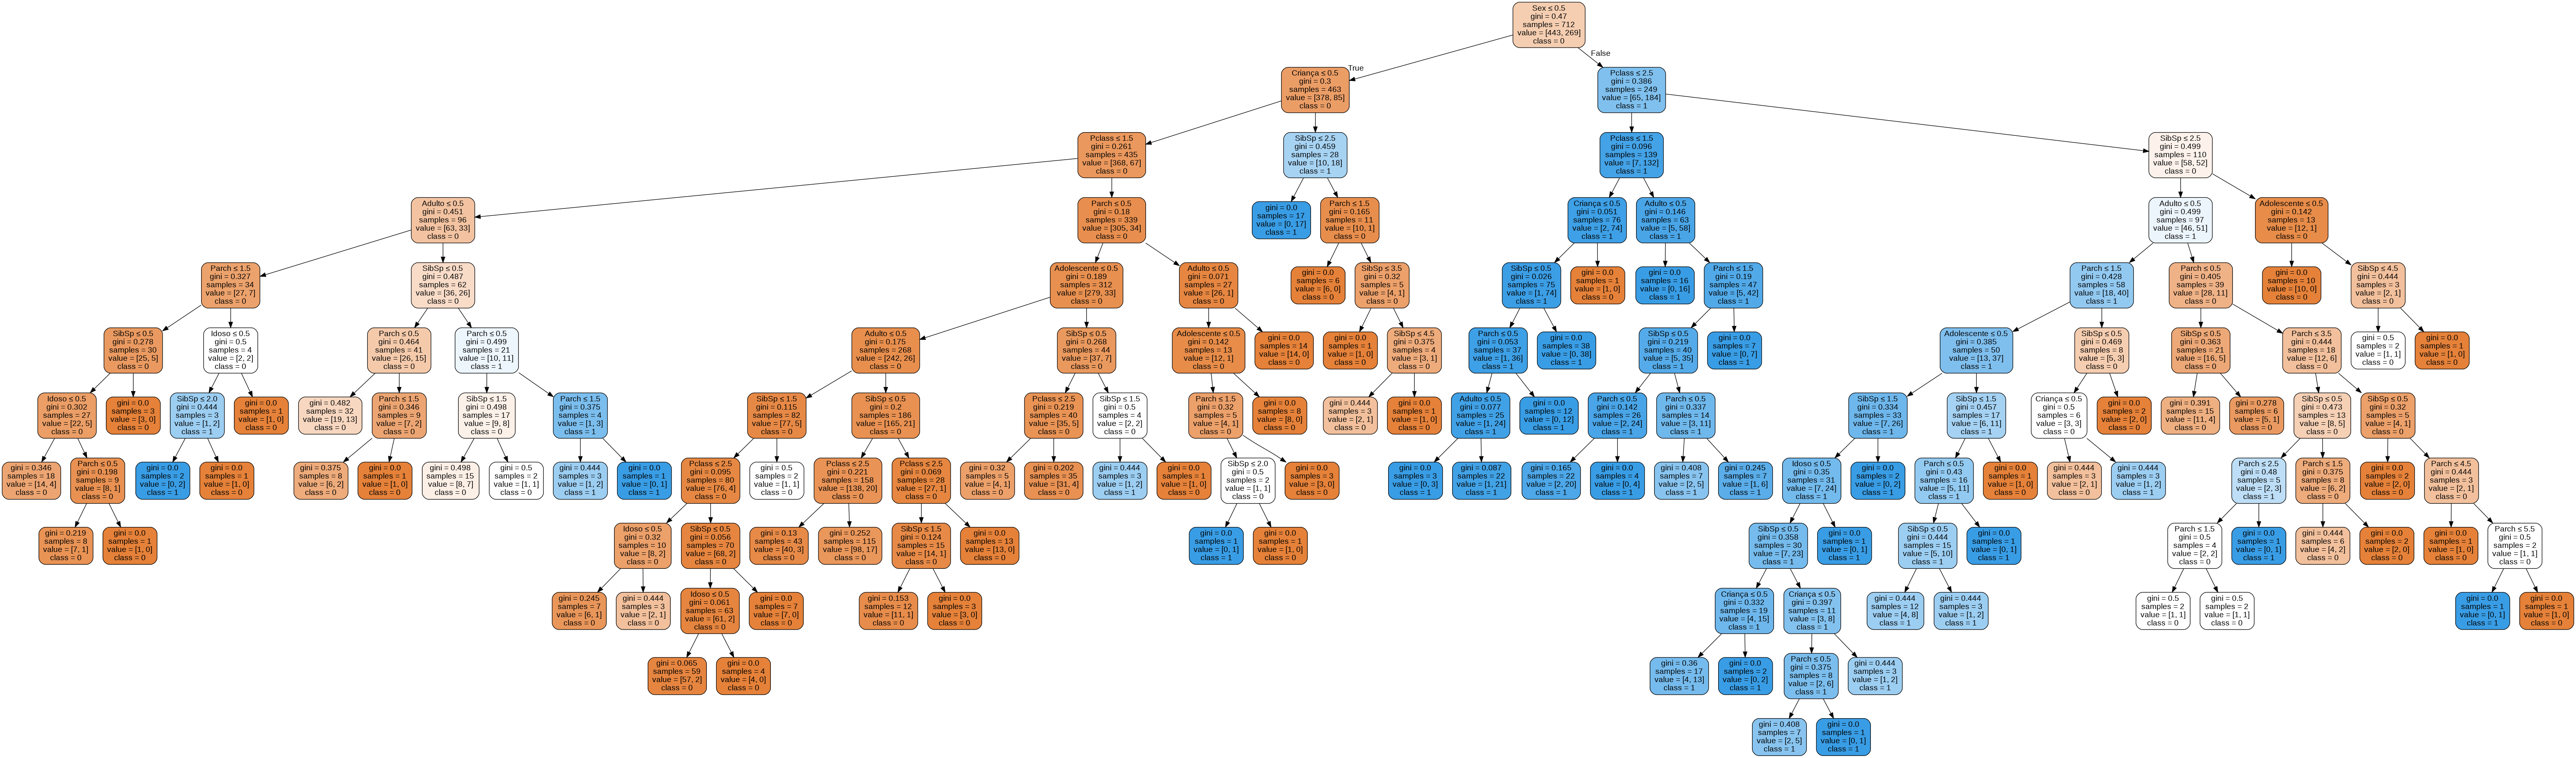

In [22]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col_recursos,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())

#**Otimização**

In [23]:
#Alterando a métrica de Gini para Entropia e alterando a profundidade da árvore
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

clf = clf.fit(x_treino,y_treino)

y_pred = clf.predict(x_valid)

In [25]:
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred))

Accuracy: 0.7877094972067039


#**Visualização pós otimização**

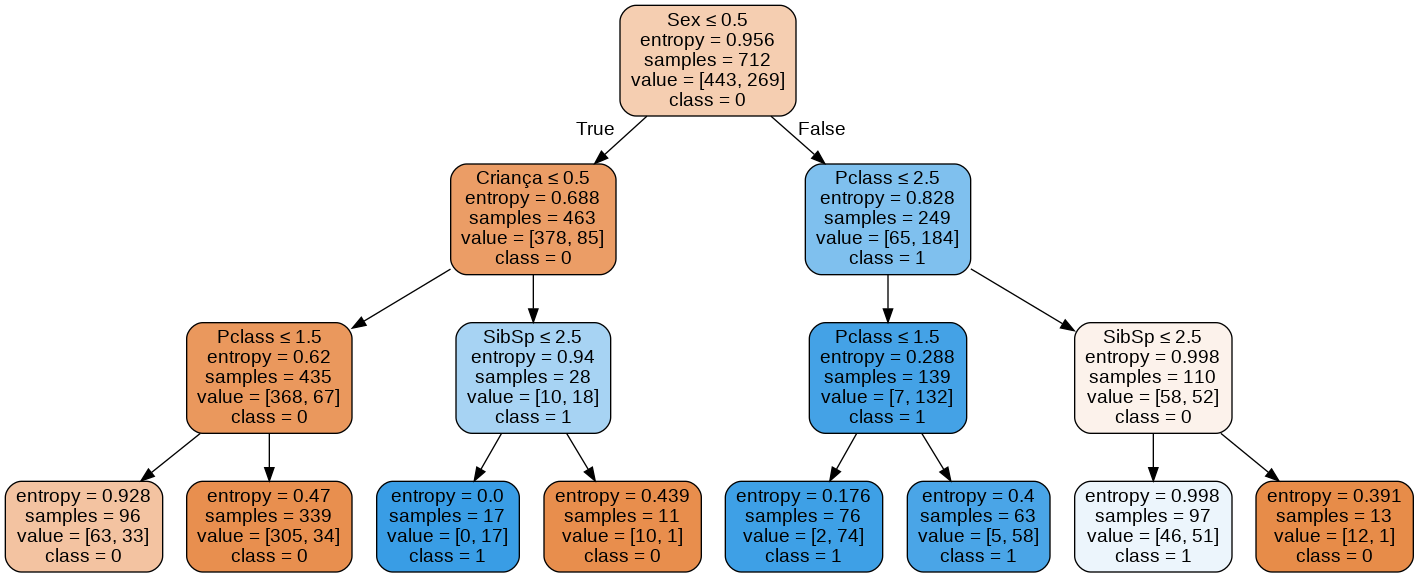

In [26]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = col_recursos,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())